In [1]:
## importing the required packages
import pandas
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import scanpy as sc
import scikitplot as skplt # for roc curve 

In [2]:
input_file_name = 'linfeidat.csv'
results_file = './write/bigdat.h5ad'  # the file that will store the analysis results

In [3]:
adata = sc.read_csv(input_file_name)
adata = sc.AnnData.transpose(adata)
adata

AnnData object with n_obs × n_vars = 16383 × 19 

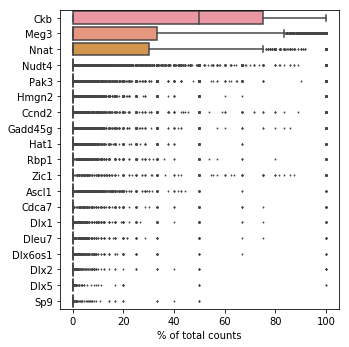

AnnData object with n_obs × n_vars = 13931 × 19 
    obs: 'n_genes', 'n_counts'

In [4]:
# normalize and filter
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=1)

#adata = adata[adata.obs['n_genes'] < 3500, :]

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4, copy=True)
adata.raw = adata
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4, copy=True)

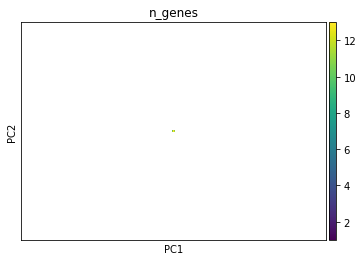

In [5]:
# pca
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='n_genes')

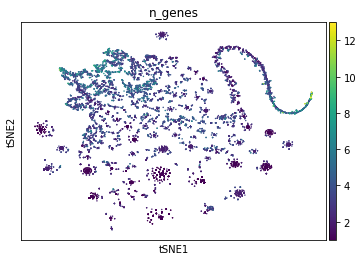

In [6]:
# tsne
ts_adata = sc.tl.tsne(adata)
sc.pl.tsne(adata, color = 'n_genes')

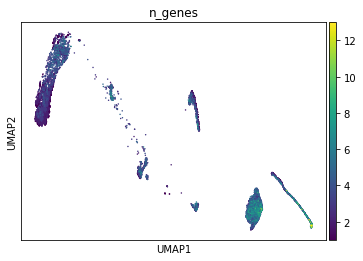

In [7]:
# umap
sc.pp.neighbors(adata, n_neighbors=1000, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata, color='n_genes')

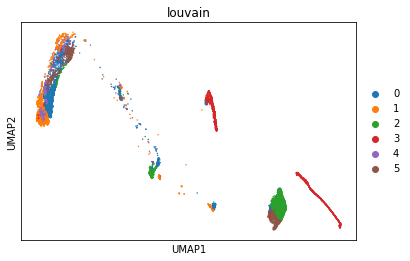

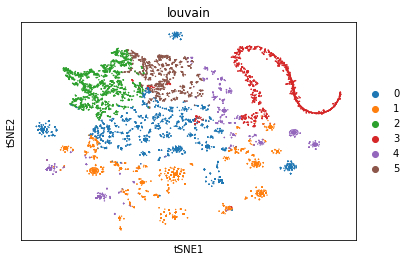

In [8]:
# louvain
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain'], use_raw=False)
sc.pl.tsne(adata, color=['louvain'], use_raw=False)
adata.write(results_file)

In [9]:
# Export single fields of the annotation of observations
adata.obs[['n_genes', 'louvain']].to_csv('./write/bigdat_run.csv')

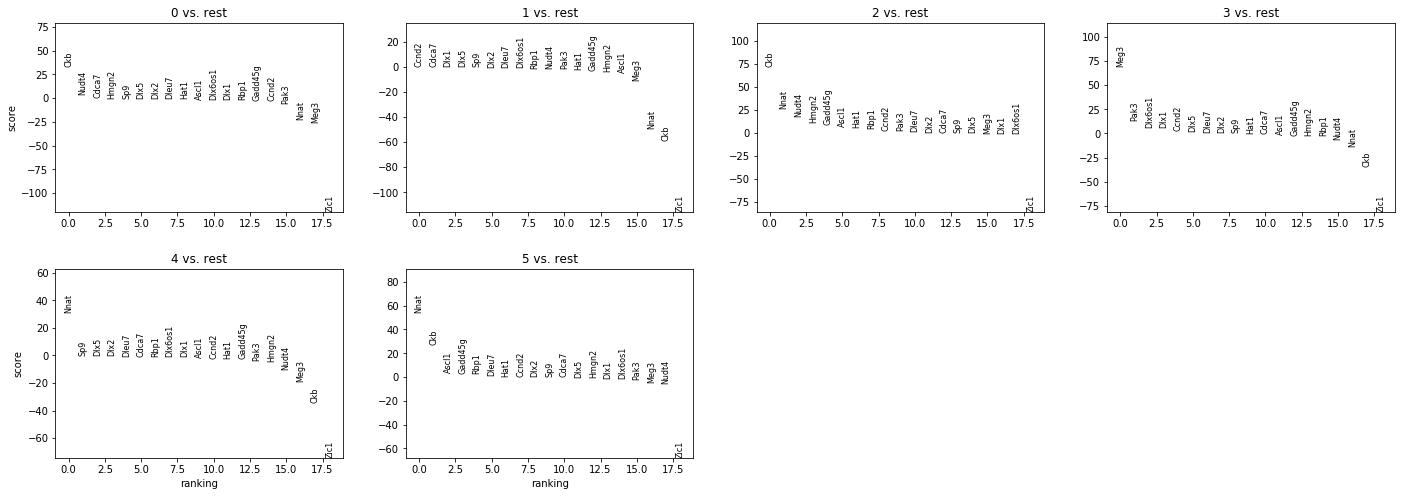

In [10]:
# finding marker genes 
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
adata.write(results_file)

In [13]:
# Export single columns of the multidimensional annotation
adata.obsm.to_df()[['X_umap1', 'X_umap2']].to_csv('./write/bigdat_umapdat.csv')
adata.obsm.to_df()[['X_tsne1', 'X_tsne2']].to_csv('./write/bigdat_tsnedat.csv')

In [14]:
filename = './write/bigdat_umapdat.csv'
X = pandas.read_csv(filename)

In [15]:
ids = X.iloc[:,0]
X.index = ids
X_vals = X.values[:, 1:]
print(X_vals)
X.head()

[[   4.71310191   -1.24067851]
 [   4.76396908   -1.23905692]
 [   5.03828911   -1.48754814]
 ...
 [-108.83269489   22.56287998]
 [-109.65750347   20.99474833]
 [-109.71402576   25.84932853]]


,Unnamed: 0,X_umap1,X_umap2
Unnamed: 0,,,
0,0,4.713102,-1.240679
1,1,4.763969,-1.239057
2,2,5.038289,-1.487548
3,3,5.002494,-1.517462
4,4,5.111542,-1.646882


# K-means

In [16]:
# Using sklearn kmeans
start = time()
km = KMeans(n_clusters=4)
km = km.fit(X_vals)
y_kmeans = km.predict(X_vals)
end = time()
print("time ", end -start)

time  0.10008597373962402


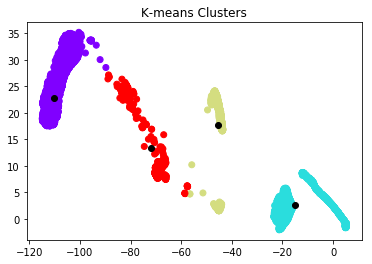

In [22]:
plt.figure
plt.scatter(X_vals[:,0], X_vals[:,1], c=km.labels_, cmap='rainbow')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black')
plt.title('K-means Clusters')
plt.show()

# DBSCAN

In [30]:
start = time()
db = DBSCAN(eps=3, min_samples=2).fit(X_vals)
y_db = db.fit_predict(X_vals)
end = time()
print("time ", end -start)


time  1.6822960376739502


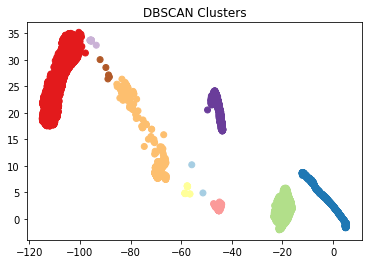

In [31]:
plt.figure
plt.scatter(X_vals[:,0], X_vals[:,1], c=y_db, cmap='Paired')
plt.title('DBSCAN Clusters')
plt.show()

# Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
start = time()
hc = AgglomerativeClustering().fit(X_vals)
y_hc = hc.fit_predict(X_vals)
end = time()
print("time ", end -start)

time  18.817875146865845


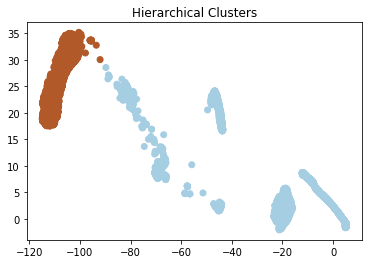

In [28]:
plt.figure
plt.scatter(X_vals[:,0], X_vals[:,1], c=y_hc, cmap='Paired')
plt.title('Hierarchical Clusters')
plt.show()